In [1]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os
from osgeo import osr
import math

In [22]:
ds = gdal.Open("lamina_A010050_20220810T211048.tif")
ds

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000002AD987D2C40> >

In [23]:
driver=gdal.GetDriverByName('GTiff')
driver

<osgeo.gdal.Driver; proxy of <Swig Object of type 'GDALDriverShadow *' at 0x000002AD9AE98960> >

<h3>Criando uma cópia do arquivo Raster</h3>

In [24]:
dst_filename = r'op_raster2.tif'
ds = driver.CreateCopy(dst_filename, ds, strict=0)

In [32]:
ds.GetProjectionRef()

'PROJCS["WGS 84 / UTM zone 21S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-57],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32721"]]'

In [25]:
data = ds.ReadAsArray()
data

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

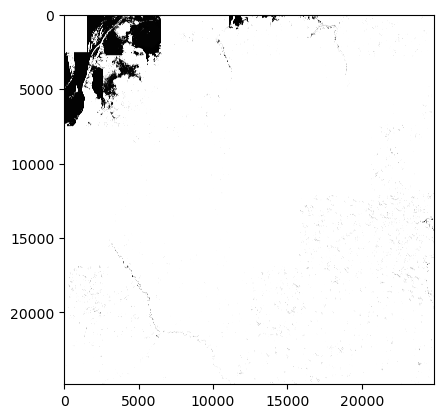

In [26]:
plt.imshow(data,cmap='gray')

In [27]:
data= np.invert(data)
data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

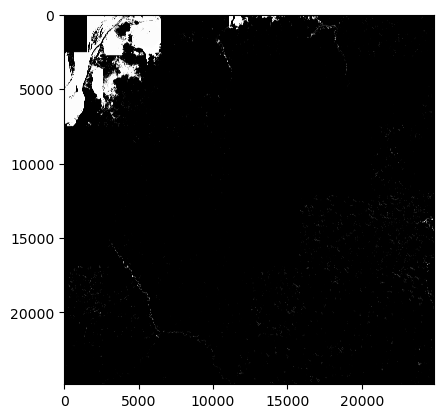

In [21]:
plt.imshow(data,cmap='gray')

In [29]:
out_band=ds.GetRasterBand(1)

In [30]:
out_band.WriteArray(data)

0

In [31]:
out_band.FlushCache()